In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.signal import square
from scipy.signal import sawtooth
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Simulation

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '600x600', '-pix_fmt', 'rgba', '-framerate', '50.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmp0eu501f5/temp.m4v']' returned non-zero exit status 255.

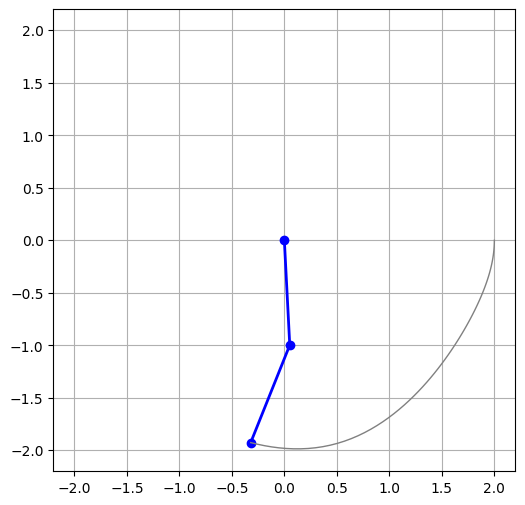

In [ ]:

g = 9.81
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0


def torque_input(t):
    freq = 0.25  # Hz
    amplitude = 1.0  # N.m
    return amplitude * square(2 * np.pi * freq * t)

def double_pendulum(t, y):
    theta1, omega1, theta2, omega2 = y
    delta = theta2 - theta1
    tau = torque_input(t)

    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta)**2
    den2 = (L2 / L1) * den1

    domega1 = (
        m2 * L1 * omega1**2 * np.sin(delta) * np.cos(delta) +
        m2 * g * np.sin(theta2) * np.cos(delta) +
        m2 * L2 * omega2**2 * np.sin(delta) -
        (m1 + m2) * g * np.sin(theta1) +
        tau
    ) / den1

    domega2 = (
        -m2 * L2 * omega2**2 * np.sin(delta) * np.cos(delta) +
        (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
        (m1 + m2) * L1 * omega1**2 * np.sin(delta) -
        (m1 + m2) * g * np.sin(theta2)
    ) / den2

    return [omega1, domega1, omega2, domega2]


y0 = [np.pi / 2, 0, np.pi / 2, 0]
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 2000)


sol = solve_ivp(double_pendulum, t_span, y0, t_eval=t_eval, rtol=1e-8)
theta1, omega1, theta2, omega2 = sol.y[0], sol.y[1], sol.y[2], sol.y[3]

# Coordinates
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)


fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2, color='blue')
trace, = ax.plot([], [], '-', lw=1, color='gray')
history_x, history_y = [], []

def init():
    line.set_data([], [])
    trace.set_data([], [])
    return line, trace

def update(frame):
    thisx = [0, x1[frame], x2[frame]]
    thisy = [0, y1[frame], y2[frame]]
    line.set_data(thisx, thisy)

    history_x.append(x2[frame])
    history_y.append(y2[frame])
    trace.set_data(history_x, history_y)
    return line, trace

ani = animation.FuncAnimation(fig, update, frames=len(t_eval),
                              init_func=init, blit=True, interval=20)

HTML(ani.to_html5_video())



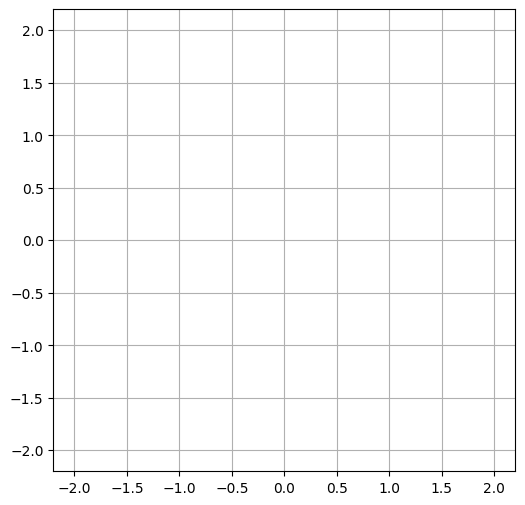

In [3]:

g = 9.81
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0


def torque_input(t):
    freq = 0.25  # Hz
    amplitude = 1.0  # N.m
    return amplitude * square(2 * np.pi * freq * t)

def double_pendulum(t, y):
    theta1, omega1, theta2, omega2 = y
    delta = theta2 - theta1
    tau = torque_input(t)

    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta)**2
    den2 = (L2 / L1) * den1

    domega1 = (
        m2 * L1 * omega1**2 * np.sin(delta) * np.cos(delta) +
        m2 * g * np.sin(theta2) * np.cos(delta) +
        m2 * L2 * omega2**2 * np.sin(delta) -
        (m1 + m2) * g * np.sin(theta1) +
        tau
    ) / den1

    domega2 = (
        -m2 * L2 * omega2**2 * np.sin(delta) * np.cos(delta) +
        (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
        (m1 + m2) * L1 * omega1**2 * np.sin(delta) -
        (m1 + m2) * g * np.sin(theta2)
    ) / den2

    return [omega1, domega1, omega2, domega2]


y0 = [np.pi / 2, 0, np.pi / 2, 0]
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)


sol = solve_ivp(double_pendulum, t_span, y0, t_eval=t_eval, rtol=1e-8)
theta1, omega1, theta2, omega2 = sol.y[0], sol.y[1], sol.y[2], sol.y[3]

# Coordinates
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)


fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2, color='blue')
trace, = ax.plot([], [], '-', lw=1, color='gray')
history_x, history_y = [], []

def init():
    line.set_data([], [])
    trace.set_data([], [])
    return line, trace

def update(frame):
    thisx = [0, x1[frame], x2[frame]]
    thisy = [0, y1[frame], y2[frame]]
    line.set_data(thisx, thisy)

    history_x.append(x2[frame])
    history_y.append(y2[frame])
    trace.set_data(history_x, history_y)
    return line, trace

#ani = animation.FuncAnimation(fig, update, frames=len(t_eval),
                              #init_func=init, blit=True, interval=20)

#HTML(ani.to_html5_video())



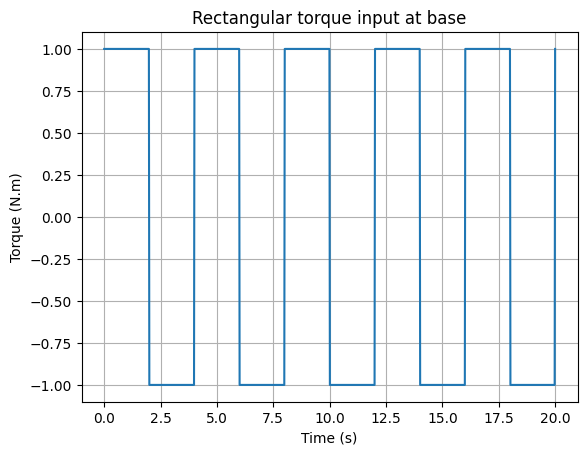

In [4]:
plt.figure()
torque_t = [torque_input(t) for t in t_eval]
plt.plot(t_eval, torque_t )
plt.title("Rectangular torque input at base")
plt.xlabel("Time (s)")
plt.ylabel("Torque (N.m)")
plt.grid()
plt.show()


# Data Preprocessing

In [5]:

X = np.array(torque_t[:-1]).reshape(-1, 1)

Y = np.column_stack((
    theta1[1:], omega1[1:],
    theta2[1:], omega2[1:]
))

split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
Y_train, Y_test = Y[:split_idx], Y[split_idx:]


scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
Y_train_scaled = scaler_Y.fit_transform(Y_train)

X_test_scaled = scaler_X.transform(X_test)
Y_test_scaled = scaler_Y.transform(Y_test)


Xtemp = np.column_stack((
    torque_t[1:],
    theta1[:-1], omega1[:-1],
    theta2[:-1], omega2[:-1]
))

scaler_Xt = StandardScaler()
Xtemp_scaled = scaler_Xt.fit_transform(Xtemp)


# MLP

In [ ]:

X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train_scaled, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
Y_test_torch = torch.tensor(Y_test_scaled, dtype=torch.float32)

class MLP(nn.Module):
    def __init__(self, input_size=5, hidden_size=256, output_size=4):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.net(x)


model = MLP()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.004)




In [ ]:
num_epochs = 200
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Initialize the first input (t=0)
    X_rec = Xtemp_scaled[0].copy().reshape(1, -1)

    preds_scaled = []

    for t in range(len(X_train_scaled)):
        X_rec_torch = torch.tensor(X_rec, dtype=torch.float32)

        Y_pred_scaled = model(X_rec_torch)
        preds_scaled.append(Y_pred_scaled)

        if t < len(X_train_scaled) - 1:
            next_torque = X_train_scaled[t + 1, 0].reshape(1, 1)
            Y_pred_np = Y_pred_scaled.detach().numpy()
            X_rec = np.concatenate([next_torque, Y_pred_np], axis=1)

    preds_scaled = torch.cat(preds_scaled, dim=0)

    Y_train_torch_seq = torch.tensor(Y_train_scaled, dtype=torch.float32)

    loss = criterion(preds_scaled, Y_train_torch_seq)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

plt.figure(figsize=(8,5))
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss (Recursive)')
plt.grid(True)
plt.show()


In [ ]:

torch.save(model.state_dict(), '/content/drive/MyDrive/mlp_model.pth')

In [ ]:
model = MLP()
model.load_state_dict(torch.load('/content/drive/MyDrive/mlp_model.pth'))
model.eval()

MLP(
  (net): Sequential(
    (0): Linear(in_features=5, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=4, bias=True)
  )
)

## test
as it was obvious, MLP has poor performance for modeling a dynamic system because of lack of memory in this kind of network architecture.
Loss: 0.957558

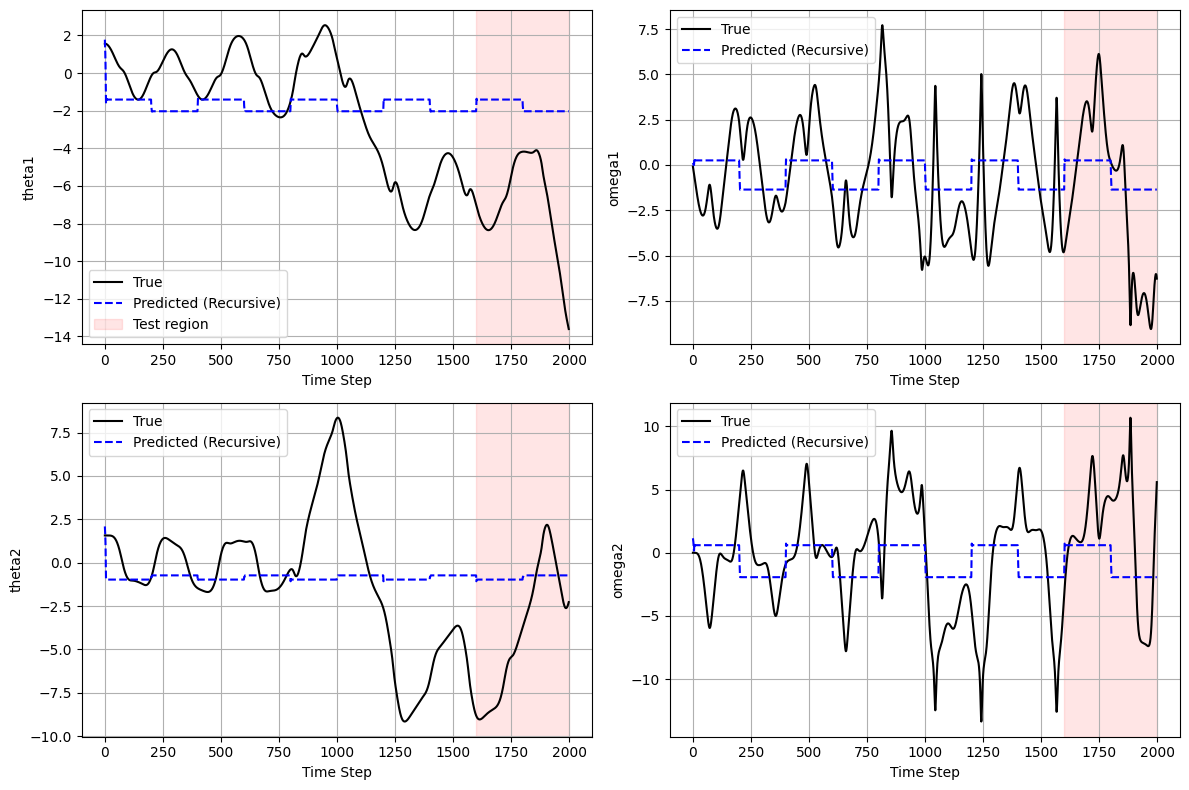

In [ ]:


X_scaled_all = np.vstack([X_train_scaled, X_test_scaled])
Y_scaled_all = np.vstack([Y_train_scaled, Y_test_scaled])

X_rec = Xtemp_scaled[0].copy().reshape(1, -1)

Y_preds_scaled = []

model.eval()
with torch.no_grad():
    for t in range(len(X_scaled_all)):
        X_rec_torch = torch.tensor(X_rec, dtype=torch.float32)
        Y_pred_scaled = model(X_rec_torch).numpy().flatten()

        Y_preds_scaled.append(Y_pred_scaled)

        if t < len(X_scaled_all) - 1:
            next_torque = X_scaled_all[t + 1, 0].reshape(1, 1)
            next_input = np.concatenate([next_torque, Y_pred_scaled.reshape(1, -1)], axis=1)
            X_rec = next_input

Y_preds_scaled = np.array(Y_preds_scaled)

Y_preds = scaler_Y.inverse_transform(Y_preds_scaled)
Y_true = scaler_Y.inverse_transform(Y_scaled_all)

plt.figure(figsize=(12, 8))
labels = ['theta1', 'omega1', 'theta2', 'omega2']
time_all = np.arange(len(Y_true))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(time_all, Y_true[:, i], label='True', color='black')
    plt.plot(time_all, Y_preds[:, i], '--', label='Predicted (Recursive)', color='blue')

    plt.axvspan(split_idx, len(Y_true)-1, color='red', alpha=0.1, label='Test region' if i == 0 else None)

    plt.xlabel('Time Step')
    plt.ylabel(labels[i])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## Sawtooth signal Test
here i tested the performance of this network in response to another typr of input torque. MLP had poor performance on train and test data so it is obvious that it will have the same poor performance here.

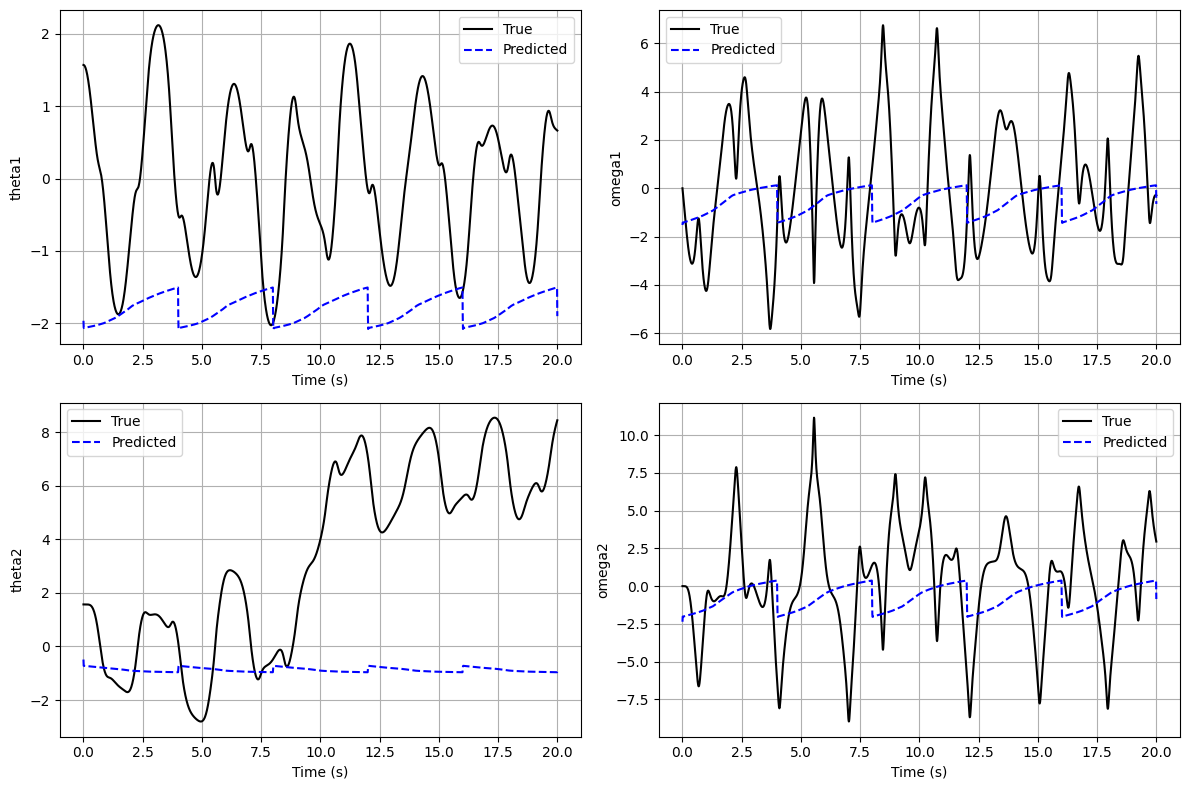

In [ ]:


def torque_input_s(t):
    freq = 0.25  # Hz
    amplitude = 1.0  # N.m
    return amplitude * sawtooth(2 * np.pi * freq * t)

def double_pendulum(t, y):
    theta1, omega1, theta2, omega2 = y
    delta = theta2 - theta1
    tau = torque_input_s(t)

    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta)**2
    den2 = (L2 / L1) * den1

    domega1 = (
        m2 * L1 * omega1**2 * np.sin(delta) * np.cos(delta) +
        m2 * g * np.sin(theta2) * np.cos(delta) +
        m2 * L2 * omega2**2 * np.sin(delta) -
        (m1 + m2) * g * np.sin(theta1) +
        tau
    ) / den1

    domega2 = (
        -m2 * L2 * omega2**2 * np.sin(delta) * np.cos(delta) +
        (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
        (m1 + m2) * L1 * omega1**2 * np.sin(delta) -
        (m1 + m2) * g * np.sin(theta2)
    ) / den2

    return [omega1, domega1, omega2, domega2]

y0 = [np.pi / 2, 0, np.pi / 2, 0]
t_span = (0, 20)
t_eval = np.linspace(*t_span, 2000)
sol = solve_ivp(double_pendulum, t_span, y0, t_eval=t_eval, rtol=1e-8)
theta1s, omega1s, theta2s, omega2s = sol.y
Y_true = np.column_stack([theta1s, omega1s, theta2s, omega2s])

torque_vals = torque_input_s(t_eval)

X_rec = np.concatenate([[[torque_vals[0]]], [y0]], axis=1)
X_rec = scaler_Xt.transform(X_rec)

Y_preds_scaled = []

model.eval()
with torch.no_grad():
    for i in range(len(t_eval)):
        X_rec_torch = torch.tensor(X_rec, dtype=torch.float32)
        Y_pred_scaled = model(X_rec_torch).numpy().flatten()
        Y_preds_scaled.append(Y_pred_scaled)

        if i < len(t_eval) - 1:
            next_torque = torque_vals[i + 1]
            next_state = scaler_Y.inverse_transform(Y_pred_scaled.reshape(1, -1)).flatten()
            next_input = np.concatenate([[next_torque], next_state]).reshape(1, -1)
            X_rec = scaler_Xt.transform(next_input)

Y_preds_scaled = np.array(Y_preds_scaled)
Y_preds = scaler_Y.inverse_transform(Y_preds_scaled)


plt.figure(figsize=(12, 8))
labels = ['theta1', 'omega1', 'theta2', 'omega2']

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(t_eval, Y_true[:, i], color='black', label='True')
    plt.plot(t_eval, Y_preds[:, i], '--', color='blue', label='Predicted')
    plt.xlabel('Time (s)')
    plt.ylabel(labels[i])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


# CNN

In [ ]:
# ==== CNN Model Definition ====

class CNN(nn.Module):
    def __init__(self,
                 input_features=5,      # torque, theta1, omega1, theta2, omega2
                 output_size=4,         # predict theta1, omega1, theta2, omega2
                 history_len=100,        # number of past time steps used
                 conv_channels=[32, 64],  # list of channels for each conv layer
                 kernel_size=3):        # kernel size for conv layers
        super(CNN, self).__init__()

        layers = []
        in_channels = input_features
        for out_channels in conv_channels:
            layers.append(nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size, padding=kernel_size // 2))
            layers.append(nn.ReLU())
            in_channels = out_channels

        self.conv = nn.Sequential(*layers)
        self.flattened_size = conv_channels[-1] * history_len
        self.fc = nn.Linear(self.flattened_size, output_size)

    def forward(self, x):
        # x shape: (batch_size, history_len, input_features)
        x = x.permute(0, 2, 1)  # -> (batch_size, input_features, history_len)
        x = self.conv(x)        # -> (batch_size, conv_channels[-1], history_len)
        x = x.view(x.size(0), -1)  # flatten
        return self.fc(x)       # -> (batch_size, output_size)

model = CNN()


## Train

Epoch [10/200], Loss: 0.860559
Epoch [20/200], Loss: 0.830949
Epoch [30/200], Loss: 0.848356
Epoch [40/200], Loss: 0.844292
Epoch [50/200], Loss: 0.829874
Epoch [60/200], Loss: 0.780925
Epoch [70/200], Loss: 0.739703
Epoch [80/200], Loss: 0.727910
Epoch [90/200], Loss: 0.923420
Epoch [100/200], Loss: 0.873479
Epoch [110/200], Loss: 0.823174
Epoch [120/200], Loss: 0.806863
Epoch [130/200], Loss: 0.790579
Epoch [140/200], Loss: 0.754323
Epoch [150/200], Loss: 0.729835
Epoch [160/200], Loss: 0.716973
Epoch [170/200], Loss: 1.250914
Epoch [180/200], Loss: 0.843343
Epoch [190/200], Loss: 0.797641
Epoch [200/200], Loss: 0.740070


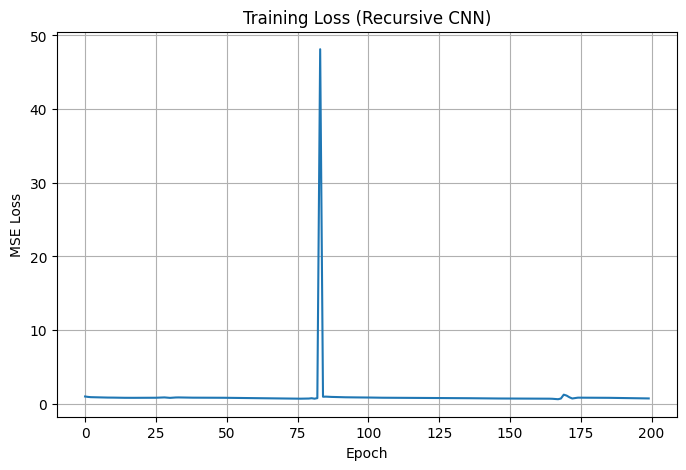

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0008)

num_epochs = 200
history_len = 100
train_losses = []

# Pad beginning with first sample repeated for warm-up history
initial_window = np.tile(Xtemp_scaled[0], (history_len, 1))

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    preds_scaled = []
    history = initial_window.copy()

    for t in range(len(X_train_scaled)):
        input_window = torch.tensor(history[-history_len:], dtype=torch.float32).unsqueeze(0)  # shape: (1, 15, 5)

        pred_scaled = model(input_window)
        preds_scaled.append(pred_scaled)

        if t < len(X_train_scaled) - 1:
            next_torque = X_train_scaled[t + 1, 0].reshape(1, 1)
            pred_np = pred_scaled.detach().numpy().reshape(1, -1)
            new_row = np.concatenate([next_torque, pred_np], axis=1)
            history = np.vstack([history, new_row])

    preds_scaled = torch.cat(preds_scaled, dim=0)
    Y_train_torch_seq = torch.tensor(Y_train_scaled, dtype=torch.float32)

    loss = criterion(preds_scaled, Y_train_torch_seq)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss (Recursive CNN)")
plt.grid(True)
plt.show()


## Test

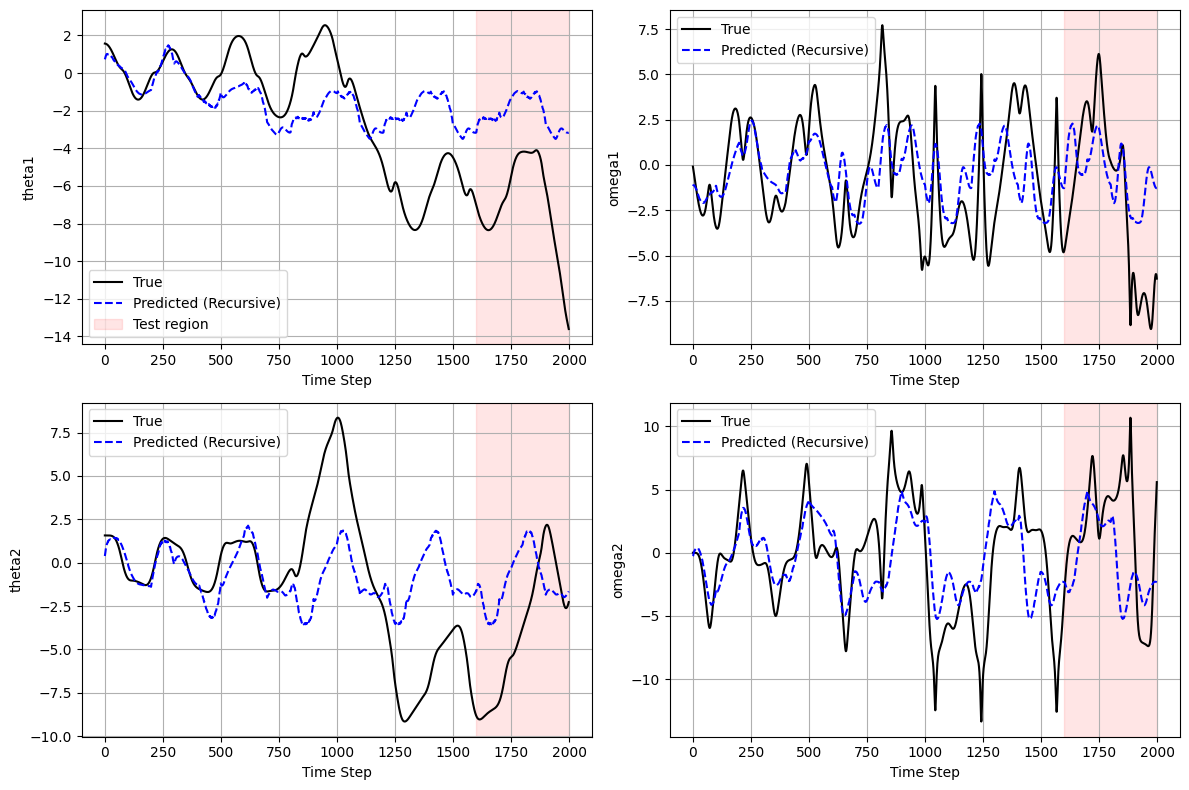

In [ ]:
X_scaled_all = np.vstack([X_train_scaled, X_test_scaled])
Y_scaled_all = np.vstack([Y_train_scaled, Y_test_scaled])

initial_window = np.tile(Xtemp_scaled[0], (history_len, 1))
history = initial_window.copy()
Y_preds_scaled = []

model.eval()
with torch.no_grad():
    for t in range(len(X_scaled_all)):
        input_window = torch.tensor(history[-history_len:], dtype=torch.float32).unsqueeze(0)  # (1, 15, 5)
        pred_scaled = model(input_window).numpy().flatten()
        Y_preds_scaled.append(pred_scaled)

        if t < len(X_scaled_all) - 1:
            next_torque = X_scaled_all[t + 1, 0].reshape(1, 1)
            new_input = np.concatenate([next_torque, pred_scaled.reshape(1, -1)], axis=1)
            history = np.vstack([history, new_input])

Y_preds_scaled = np.array(Y_preds_scaled)
Y_preds = scaler_Y.inverse_transform(Y_preds_scaled)
Y_true = scaler_Y.inverse_transform(Y_scaled_all)

# Plotting
plt.figure(figsize=(12, 8))
labels = ['theta1', 'omega1', 'theta2', 'omega2']
time_all = np.arange(len(Y_true))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(time_all, Y_true[:, i], label='True', color='black')
    plt.plot(time_all, Y_preds[:, i], '--', label='Predicted (Recursive)', color='blue')
    plt.axvspan(split_idx, len(Y_true) - 1, color='red', alpha=0.1, label='Test region' if i == 0 else None)
    plt.xlabel('Time Step')
    plt.ylabel(labels[i])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# save model
save_path = '/content/drive/MyDrive/cnn_moddel.pth'
torch.save(model.state_dict(), save_path)
print(f'Model saved to {save_path}')

Model saved to /content/drive/MyDrive/cnn_moddel.pth


In [ ]:
# load model
save_path = '/content/drive/MyDrive/cnn_moddel.pth'
model = CNN(
    input_features=5,
    output_size=4,
    history_len=history_len,
    conv_channels=[32, 64],
    kernel_size=3
)

# Load the saved weights
model.load_state_dict(torch.load(save_path))
model.eval()

print("Model loaded successfully.")

Model loaded successfully.


## Sawtooth signal Test

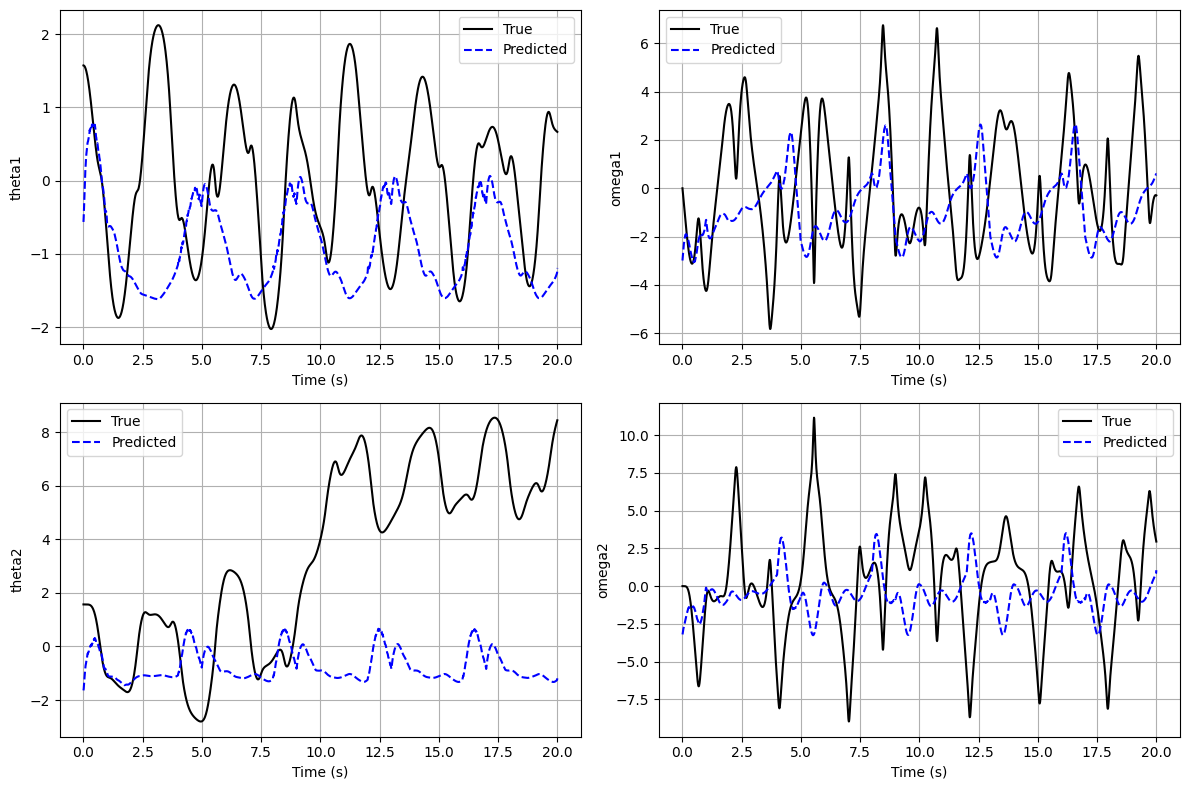

In [ ]:

# Generate sawtooth torque signal
def torque_input_s(t):
    freq = 0.25  # Hz
    amplitude = 1.0  # N.m
    return amplitude * sawtooth(2 * np.pi * freq * t)

# Define the system
def double_pendulum(t, y):
    theta1, omega1, theta2, omega2 = y
    delta = theta2 - theta1
    tau = torque_input_s(t)

    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta)**2
    den2 = (L2 / L1) * den1

    domega1 = (
        m2 * L1 * omega1**2 * np.sin(delta) * np.cos(delta) +
        m2 * g * np.sin(theta2) * np.cos(delta) +
        m2 * L2 * omega2**2 * np.sin(delta) -
        (m1 + m2) * g * np.sin(theta1) +
        tau
    ) / den1

    domega2 = (
        -m2 * L2 * omega2**2 * np.sin(delta) * np.cos(delta) +
        (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
        (m1 + m2) * L1 * omega1**2 * np.sin(delta) -
        (m1 + m2) * g * np.sin(theta2)
    ) / den2

    return [omega1, domega1, omega2, domega2]

# Time and initial condition
t_span = (0, 20)
t_eval = np.linspace(*t_span, 2000)
y0 = [np.pi / 2, 0, np.pi / 2, 0]

# Solve ODE for ground truth
sol = solve_ivp(double_pendulum, t_span, y0, t_eval=t_eval, rtol=1e-8)
theta1s, omega1s, theta2s, omega2s = sol.y
Y_true = np.column_stack([theta1s, omega1s, theta2s, omega2s])
torque_vals = torque_input_s(t_eval)

# Prepare initial history
initial_state = np.concatenate([[torque_vals[0]], y0])
initial_state_scaled = scaler_Xt.transform(initial_state.reshape(1, -1))
history = np.repeat(initial_state_scaled, history_len, axis=0)  # shape: (history_len, 5)

Y_preds_scaled = []

model.eval()
with torch.no_grad():
    for i in range(len(t_eval)):
        input_window = torch.tensor(history[-history_len:], dtype=torch.float32).unsqueeze(0)  # (1, history_len, 5)
        pred_scaled = model(input_window).numpy().flatten()
        Y_preds_scaled.append(pred_scaled)

        if i < len(t_eval) - 1:
            next_torque = torque_vals[i + 1]
            next_state_unscaled = scaler_Y.inverse_transform(pred_scaled.reshape(1, -1)).flatten()
            next_input = np.concatenate([[next_torque], next_state_unscaled]).reshape(1, -1)
            next_input_scaled = scaler_Xt.transform(next_input)
            history = np.vstack([history, next_input_scaled])

Y_preds_scaled = np.array(Y_preds_scaled)
Y_preds = scaler_Y.inverse_transform(Y_preds_scaled)

# === Plot Results ===
plt.figure(figsize=(12, 8))
labels = ['theta1', 'omega1', 'theta2', 'omega2']

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(t_eval, Y_true[:, i], color='black', label='True')
    plt.plot(t_eval, Y_preds[:, i], '--', color='blue', label='Predicted')
    plt.xlabel('Time (s)')
    plt.ylabel(labels[i])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## CNN Results

in modelling a dynamic system the memory in the network in vital but CNN does not have any memory itself, so it was predictable that its performance would be poor and that is what you can see in the previous cells output ( both in test part and sawtooth force test part )
it should be noted that learning rate, model architeture and "history_len" is optimised manually. it can be seen that with increasing hhistory_len the performnace gets better and that is because we give more of the history to the network.
Loss : 0.63

# LSTM

## Data Preprocessing

In [6]:

# Reshape: (batch, seq_len, features)
X_train_seq = X_train_scaled.reshape(1, X_train_scaled.shape[0], X_train_scaled.shape[1])
Y_train_seq = Y_train_scaled.reshape(1, Y_train_scaled.shape[0], Y_train_scaled.shape[1])

X_test_seq = X_test_scaled.reshape(1, X_test_scaled.shape[0], X_test_scaled.shape[1])
Y_test_seq = Y_test_scaled.reshape(1, Y_test_scaled.shape[0], Y_test_scaled.shape[1])

X_train_t = torch.tensor(X_train_seq, dtype=torch.float32)
Y_train_t = torch.tensor(Y_train_seq, dtype=torch.float32)

X_test_t = torch.tensor(X_test_seq, dtype=torch.float32)
Y_test_t = torch.tensor(Y_test_seq, dtype=torch.float32)



In [ ]:
def create_sequences(X, Y, seq_len):
    X_seqs, Y_seqs = [], []
    for i in range(len(X) - seq_len):
        X_seqs.append(X[i:i+seq_len])
        Y_seqs.append(Y[i:i+seq_len])
    return np.array(X_seqs), np.array(Y_seqs)

SEQ_LEN = 100

X_train_seq, Y_train_seq = create_sequences(X_train_scaled, Y_train_scaled, SEQ_LEN)
X_test_seq, Y_test_seq = create_sequences(X_test_scaled, Y_test_scaled, SEQ_LEN)

X_train_t = torch.tensor(X_train_seq, dtype=torch.float32)  # shape (batch, seq_len, 1)
Y_train_t = torch.tensor(Y_train_seq, dtype=torch.float32)  # shape (batch, seq_len, 4)

X_test_t = torch.tensor(X_test_seq, dtype=torch.float32)  # shape (batch, seq_len, 1)
Y_test_t = torch.tensor(Y_test_seq, dtype=torch.float32)  # shape (batch, seq_len, 4)

## Model

In [14]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, output_size=4, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True)
        self.layer_norm = nn.LayerNorm(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden=None):  # <-- accept hidden as a second argument
        lstm_out, hidden = self.lstm(x, hidden)
        norm_out = self.layer_norm(lstm_out)
        output = self.fc(norm_out)
        return output, hidden

model = LSTMModel(input_size=5, hidden_size=16, output_size=4, num_layers=1).to(device)



## Train

In [8]:

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.004) #, alpha=0.9)
train_losses = []
epochs = 1000

torque_seq = X_train_scaled
Y_true = Y_train_scaled
init_input = Xtemp_scaled[0]

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    hidden = None
    loss = 0.0
    predictions = []

    prev_state = init_input[1:]

    for t in range(len(torque_seq)):
        torque_t = torque_seq[t]
        input_t = np.concatenate([torque_t, prev_state])
        input_t = torch.tensor(input_t, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)

        output_t, hidden = model(input_t, hidden)
        output_t = output_t.squeeze(0).squeeze(0)
        predictions.append(output_t)

        target_t = torch.tensor(Y_true[t], dtype=torch.float32).to(device)
        loss += criterion(output_t, target_t)

        prev_state = output_t.detach().numpy()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()

    train_losses.append(loss.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")


plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

Epoch 0: Loss = 948.213440
Epoch 20: Loss = 764.137634
Epoch 40: Loss = 739.539795
Epoch 60: Loss = 741.919556
Epoch 80: Loss = 717.397583
Epoch 100: Loss = 689.959412
Epoch 120: Loss = 682.192444


KeyboardInterrupt: 

In [16]:

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0008) #, alpha=0.9)
train_losses = []
epochs = 1000

torque_seq = X_train_scaled
Y_true = Y_train_scaled
init_input = Xtemp_scaled[0]

teacher_forcing_ratio = 0.5  # use 0.0 for no forcing, 1.0 for always forcing

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    hidden = None
    loss = 0.0
    predictions = []

    prev_state = init_input[1:]  # (4,)

    for t in range(len(torque_seq)):
        torque_t = torque_seq[t]  # (1,)
        input_t_np = np.concatenate([torque_t, prev_state])  # (5,)
        input_t = torch.tensor(input_t_np, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)  # (1,1,5)

        output_t, hidden = model(input_t, hidden)  # (1,1,4)
        output_t = output_t.squeeze(0).squeeze(0)  # (4,)
        predictions.append(output_t)

        target_t = torch.tensor(Y_true[t], dtype=torch.float32).to(device)
        loss += criterion(output_t, target_t)

        # 🔁 Teacher Forcing Decision
        if t < len(Y_true) - 1:  # skip final prediction
            use_teacher = np.random.rand() < teacher_forcing_ratio
            if use_teacher:
                prev_state = Y_true[t]  # use true previous state
            else:
                prev_state = output_t.detach().cpu().numpy()  # use predicted state

    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()

    train_losses.append(loss.item())
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")


Epoch 0: Loss = 20.856436
Epoch 20: Loss = 20.084888
Epoch 40: Loss = 15.909038
Epoch 60: Loss = 16.575127
Epoch 80: Loss = 11.667954
Epoch 100: Loss = 11.464996
Epoch 120: Loss = 10.034420
Epoch 140: Loss = 8.011674
Epoch 160: Loss = 7.495463
Epoch 180: Loss = 6.926023
Epoch 200: Loss = 5.805110
Epoch 220: Loss = 10.315813
Epoch 240: Loss = 5.329799
Epoch 260: Loss = 4.620228
Epoch 280: Loss = 4.595580
Epoch 300: Loss = 3.580847
Epoch 320: Loss = 3.589397
Epoch 340: Loss = 3.948745
Epoch 360: Loss = 4.944630
Epoch 380: Loss = 2.712199
Epoch 400: Loss = 3.633159
Epoch 420: Loss = 2.753913
Epoch 440: Loss = 2.508551
Epoch 460: Loss = 3.130481
Epoch 480: Loss = 2.351387
Epoch 500: Loss = 3.868105
Epoch 520: Loss = 1.980433
Epoch 540: Loss = 2.436141
Epoch 560: Loss = 2.743971
Epoch 580: Loss = 1.839780
Epoch 600: Loss = 1.804082
Epoch 620: Loss = 2.828414
Epoch 640: Loss = 1.761730
Epoch 660: Loss = 2.412046
Epoch 680: Loss = 1.516979
Epoch 700: Loss = 2.298376
Epoch 720: Loss = 2.276266

KeyboardInterrupt: 

## Test

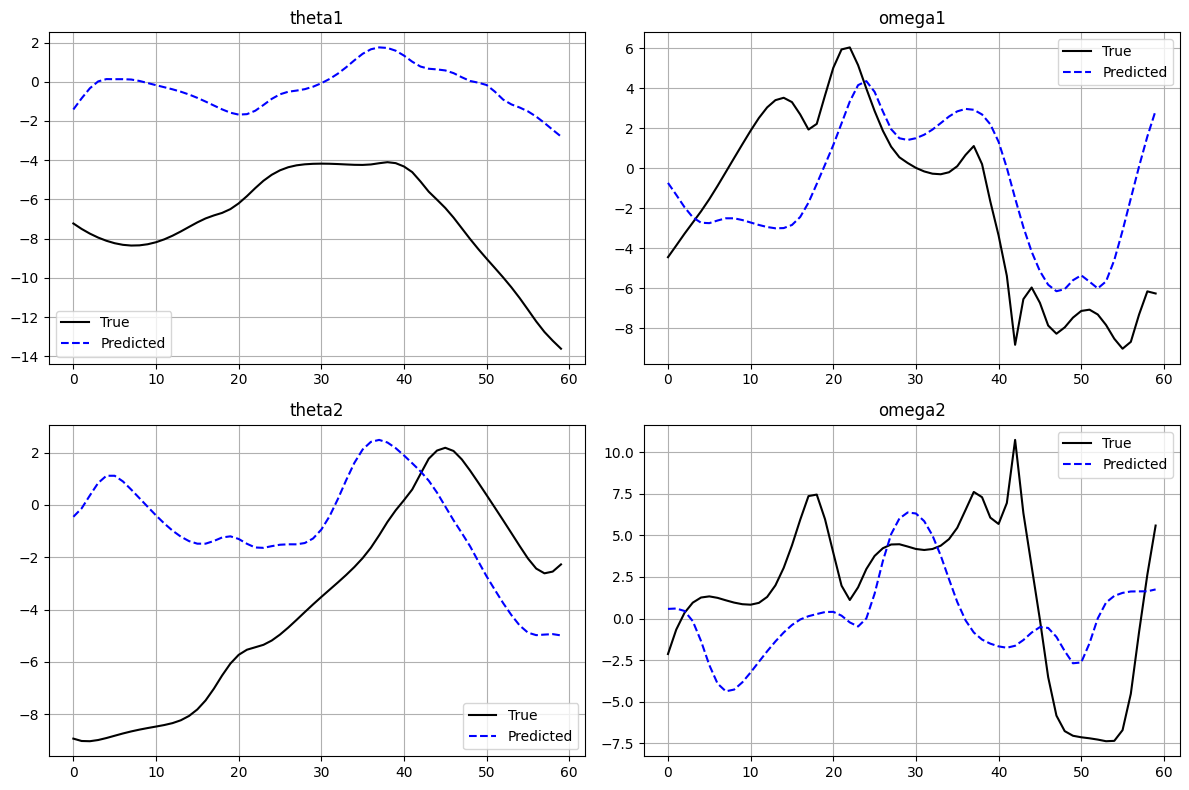

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_t).squeeze(0).numpy()
    y_pred_test = model(X_test_t).squeeze(0).numpy()

# Inverse transform
y_pred_train_unscaled = scaler_Y.inverse_transform(y_pred_train)
y_pred_test_unscaled = scaler_Y.inverse_transform(y_pred_test)
y_true_test_unscaled = scaler_Y.inverse_transform(Y_test_t.squeeze(0).numpy())

labels = ['theta1', 'omega1', 'theta2', 'omega2']
plt.figure(figsize=(12, 8))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_true_test_unscaled[:, i], label='True', color='black')
    plt.plot(y_pred_test_unscaled[:, i], '--', label='Predicted', color='blue')
    plt.title(labels[i])
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
#torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model.pth')

In [ ]:

model = LSTMModel(input_size=5, hidden_size=64, output_size=4, num_layers=1)
model.load_state_dict(torch.load('/content/drive/MyDrive/lstm_model.pth'))
model.eval()

LSTMModel(
  (lstm): LSTM(5, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=4, bias=True)
)

## Sawtooth torque test

Sawtooth Torque Test MSE Loss: 1.972085


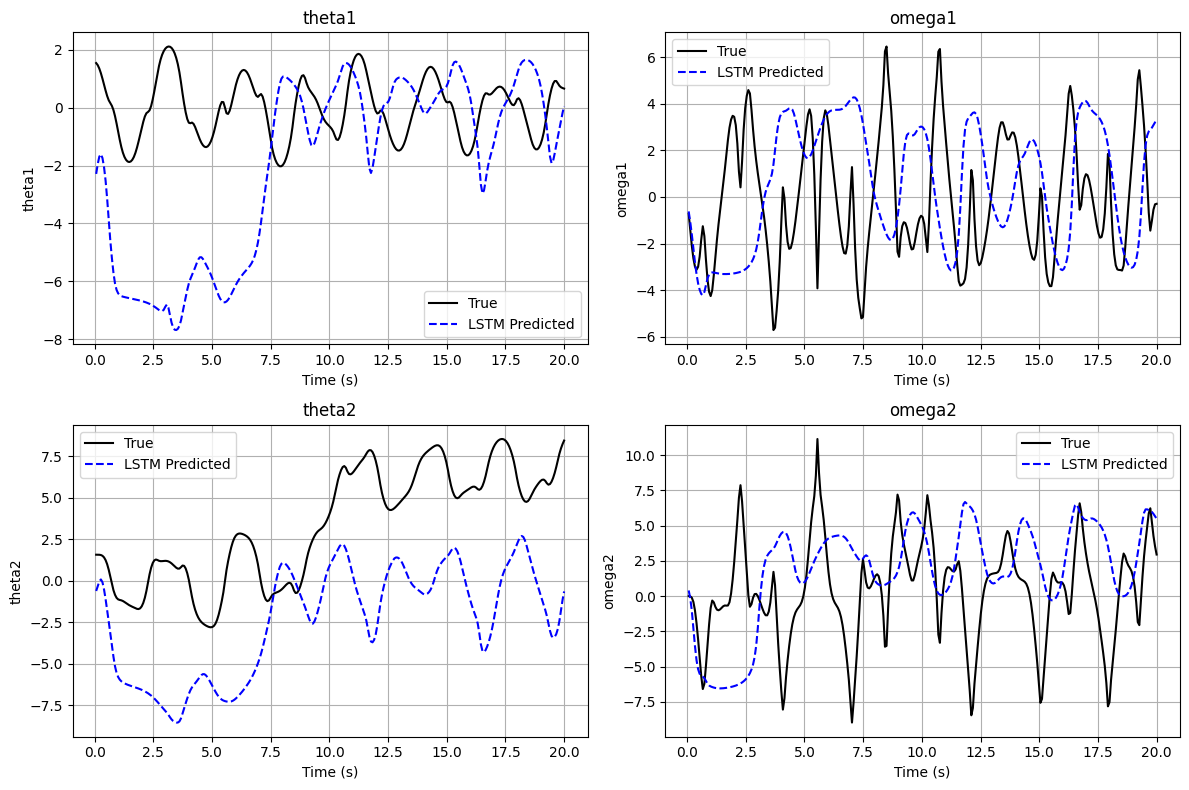

In [ ]:

def torque_input_saw(t):
    freq = 0.25 # Hz
    amplitude = 1.0  # N·m
    return amplitude * sawtooth(2 * np.pi * freq * t)

def double_pendulum_saw(t, y):
    theta1, omega1, theta2, omega2 = y
    delta = theta2 - theta1
    tau = torque_input_saw(t)

    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta) ** 2
    den2 = (L2 / L1) * den1

    domega1 = (
        m2 * L1 * omega1 ** 2 * np.sin(delta) * np.cos(delta)
        + m2 * g * np.sin(theta2) * np.cos(delta)
        + m2 * L2 * omega2 ** 2 * np.sin(delta)
        - (m1 + m2) * g * np.sin(theta1)
        + tau
    ) / den1

    domega2 = (
        -m2 * L2 * omega2 ** 2 * np.sin(delta) * np.cos(delta)
        + (m1 + m2) * g * np.sin(theta1) * np.cos(delta)
        - (m1 + m2) * L1 * omega1 ** 2 * np.sin(delta)
        - (m1 + m2) * g * np.sin(theta2)
    ) / den2

    return [omega1, domega1, omega2, domega2]

# Initial conditions and time
y0 = [np.pi / 2, 0, np.pi / 2, 0]
t_span = (0, 20)
t_eval = np.linspace(*t_span, 300)

# Simulate system with sawtooth torque
sol = solve_ivp(double_pendulum_saw, t_span, y0, t_eval=t_eval, rtol=1e-8)
theta1_s, omega1_s, theta2_s, omega2_s = sol.y
Y_true_saw = np.column_stack([theta1_s, omega1_s, theta2_s, omega2_s])
torque_saw = np.array([torque_input_saw(t) for t in t_eval])

X_saw = np.array(torque_saw[:-1]).reshape(-1, 1)

# Scale using same scalers used in training
X_saw_scaled = scaler_X.transform(X_saw)

# Reshape to LSTM format: (batch, seq_len, features)
X_saw_seq = X_saw_scaled.reshape(1, X_saw_scaled.shape[0], X_saw_scaled.shape[1])
X_saw_torch = torch.tensor(X_saw_seq, dtype=torch.float32)

model.eval()
with torch.no_grad():
    Y_pred_scaled = model(X_saw_torch).squeeze(0).numpy()

# Inverse transform to get physical values
Y_pred_saw = scaler_Y.inverse_transform(Y_pred_scaled)

from torch.nn import MSELoss
# Prepare true output (scaled)
Y_true_saw_shifted = Y_true_saw[1:]  # Skip first time step to align with X_saw
Y_true_saw_scaled = scaler_Y.transform(Y_true_saw_shifted)

Y_pred_tensor = torch.tensor(Y_pred_scaled, dtype=torch.float32)
Y_true_tensor = torch.tensor(Y_true_saw_scaled, dtype=torch.float32)

mse = MSELoss()
mse_loss = mse(Y_pred_tensor, Y_true_tensor).item()
print(f"Sawtooth Torque Test MSE Loss: {mse_loss:.6f}")


plt.figure(figsize=(12, 8))
labels = ['theta1', 'omega1', 'theta2', 'omega2']

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(t_eval[1:], Y_true_saw[1:, i], label='True', color='black')
    plt.plot(t_eval[1:], Y_pred_saw[:, i], '--', label='LSTM Predicted', color='blue')
    plt.title(labels[i])
    plt.xlabel('Time (s)')
    plt.ylabel(labels[i])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## LSTM Results
Modeling a nonlinear system is a challenging task. The following approaches were explored to tackle this problem:

- Initially, I used only the torque signal as input to the LSTM. Based on past experience, this approach had yielded good results. However, in this case, it led to gradient explosion. I attempted to mitigate this using layer normalization and gradient clipping during training, but unfortunately, it was not effective.

- Next, I modified the network to accept five inputs: the torque and the four state variables from the previous time step. While this seemed like a more complete representation of the system, the model still failed to converge properly.

- Finally, I implemented teacher forcing, where the ground-truth state is fed into the model during training instead of the model's own predictions. Over time, I gradually reduced the teacher forcing ratio, allowing the network to learn to rely on its own outputs. This approach produced significantly better results.

Sawtooth Torque Test MSE Loss: 0.017242

# BLSTM

## Model

In [ ]:
class BLSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, output_size=4, num_layers=1):
        super(BLSTMModel, self).__init__()
        self.blstm = nn.LSTM(input_size=input_size,
                             hidden_size=hidden_size,
                             num_layers=num_layers,
                             batch_first=True,
                             bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Multiply hidden size by 2 for bidirectional

    def forward(self, x):
        lstm_out, _ = self.blstm(x)  # lstm_out: (batch, seq_len, hidden_size*2)
        output = self.fc(lstm_out)   # apply FC at each time step
        return output

model = BLSTMModel(input_size=5, hidden_size=128, output_size=4, num_layers=2)



Epoch 0: Loss = 0.000299
Epoch 10: Loss = 0.000293
Epoch 20: Loss = 0.000257
Epoch 30: Loss = 0.000296
Epoch 40: Loss = 0.000247
Epoch 50: Loss = 0.000314
Epoch 60: Loss = 0.000269
Epoch 70: Loss = 0.000327
Epoch 80: Loss = 0.000238
Epoch 90: Loss = 0.000237


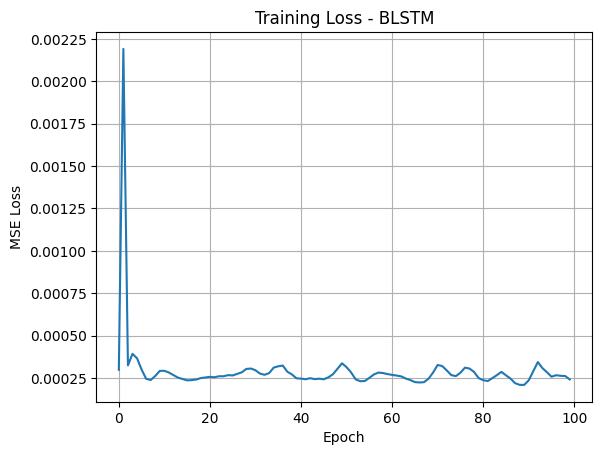

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.0001, alpha=0.9)
train_losses = []
epochs = 100

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_t)
    loss = criterion(output, Y_train_t)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss - BLSTM")
plt.grid(True)
plt.show()

## test

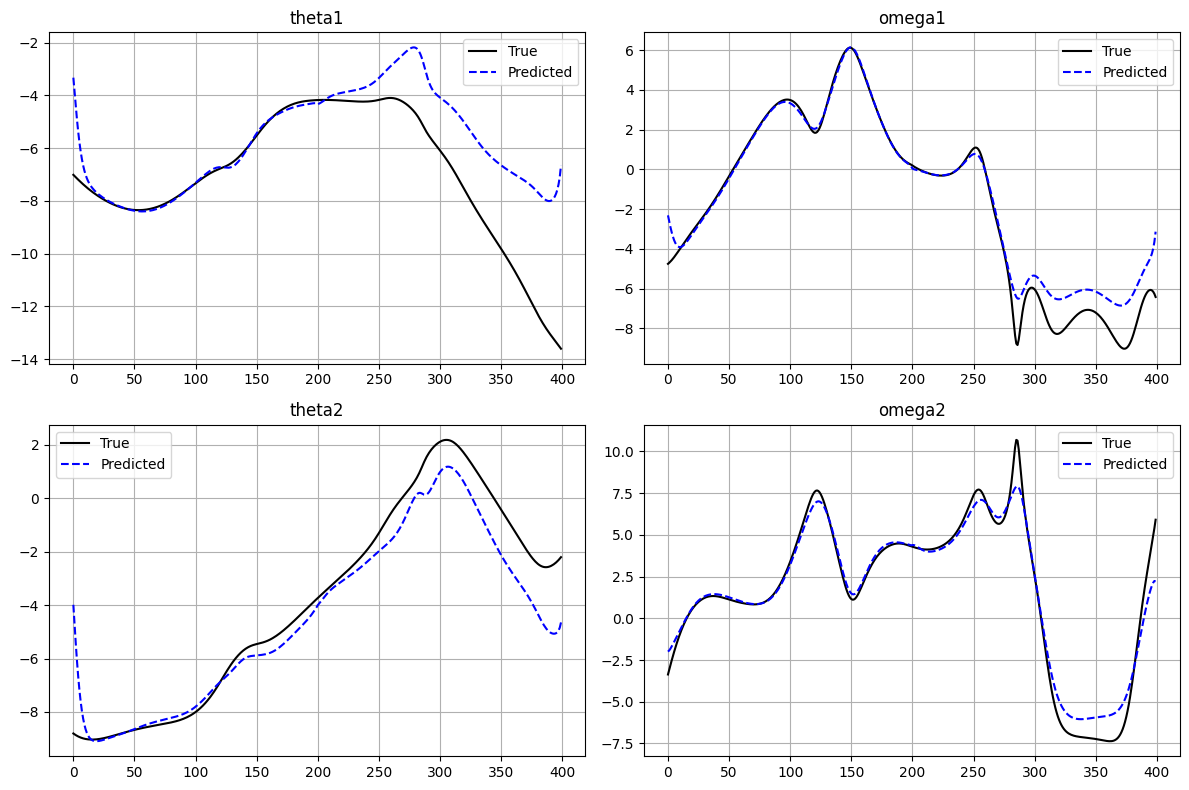

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_t).squeeze(0).numpy()
    y_pred_test = model(X_test_t).squeeze(0).numpy()

# Inverse transform
y_pred_train_unscaled = scaler_Y.inverse_transform(y_pred_train)
y_pred_test_unscaled = scaler_Y.inverse_transform(y_pred_test)
y_true_test_unscaled = scaler_Y.inverse_transform(Y_test_t.squeeze(0).numpy())

labels = ['theta1', 'omega1', 'theta2', 'omega2']
plt.figure(figsize=(12, 8))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_true_test_unscaled[:, i], label='True', color='black')
    plt.plot(y_pred_test_unscaled[:, i], '--', label='Predicted', color='blue')
    plt.title(labels[i])
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/blstm_model.pth')

In [ ]:

model = BLSTMModel(input_size=5, hidden_size=128, output_size=4, num_layers=1)
model.load_state_dict(torch.load('/content/drive/MyDrive/blstm_model.pth'))
model.eval()

BLSTMModel(
  (blstm): LSTM(5, 128, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=256, out_features=4, bias=True)
)

## Sawtooth torque test

Sawtooth Torque Test Loss (MSE): 0.013025


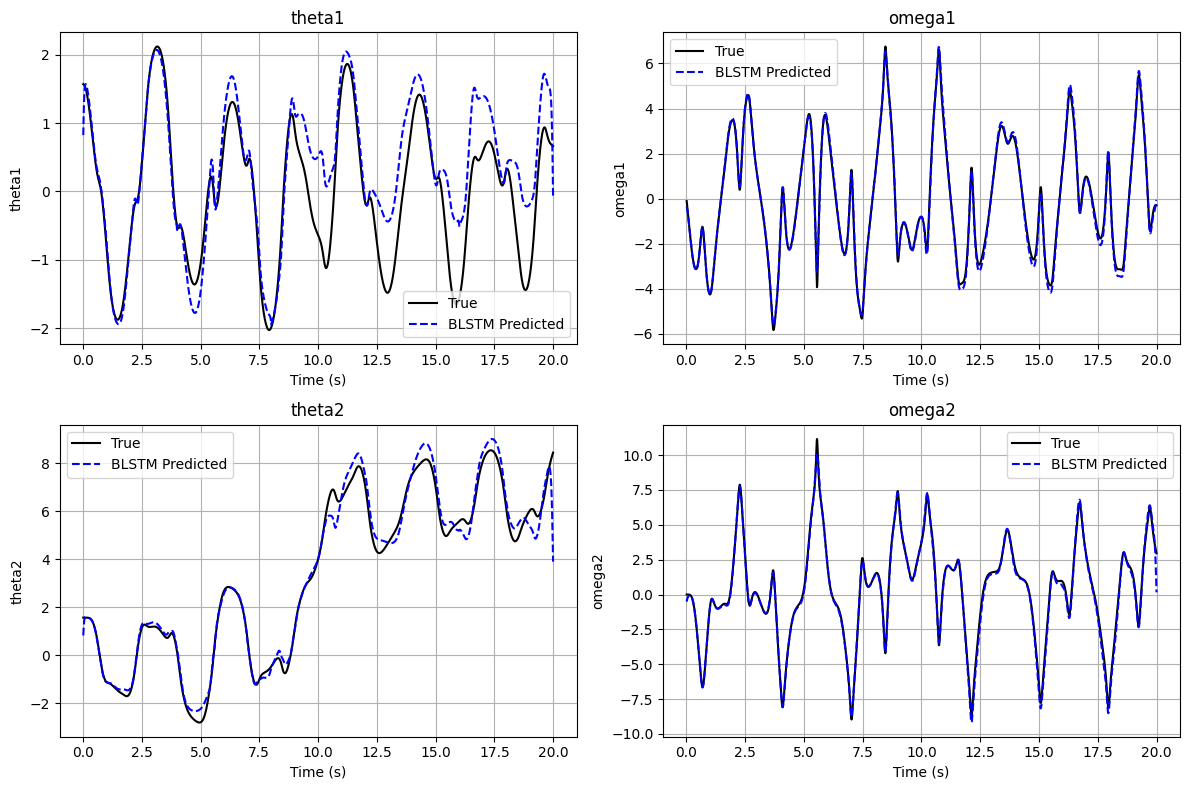

In [ ]:


def torque_input_saw(t):
    freq = 0.25
    amplitude = 1.0
    return amplitude * sawtooth(2 * np.pi * freq * t)

def double_pendulum_saw(t, y):
    theta1, omega1, theta2, omega2 = y
    delta = theta2 - theta1
    tau = torque_input_saw(t)

    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta) ** 2
    den2 = (L2 / L1) * den1

    domega1 = (
        m2 * L1 * omega1 ** 2 * np.sin(delta) * np.cos(delta)
        + m2 * g * np.sin(theta2) * np.cos(delta)
        + m2 * L2 * omega2 ** 2 * np.sin(delta)
        - (m1 + m2) * g * np.sin(theta1)
        + tau
    ) / den1

    domega2 = (
        -m2 * L2 * omega2 ** 2 * np.sin(delta) * np.cos(delta)
        + (m1 + m2) * g * np.sin(theta1) * np.cos(delta)
        - (m1 + m2) * L1 * omega1 ** 2 * np.sin(delta)
        - (m1 + m2) * g * np.sin(theta2)
    ) / den2

    return [omega1, domega1, omega2, domega2]

# Simulate
y0 = [np.pi / 2, 0, np.pi / 2, 0]
t_span = (0, 20)
t_eval = np.linspace(*t_span, 2000)
sol = solve_ivp(double_pendulum_saw, t_span, y0, t_eval=t_eval, rtol=1e-8)
theta1_s, omega1_s, theta2_s, omega2_s = sol.y
Y_true_saw = np.column_stack([theta1_s, omega1_s, theta2_s, omega2_s])
torque_saw = np.array([torque_input_saw(t) for t in t_eval])

# Preprocess input
X_saw = np.column_stack([
    torque_saw[1:],
    theta1_s[:-1], omega1_s[:-1],
    theta2_s[:-1], omega2_s[:-1]
])
X_saw_scaled = scaler_X.transform(X_saw)
X_saw_seq = X_saw_scaled.reshape(1, X_saw_scaled.shape[0], X_saw_scaled.shape[1])
X_saw_torch = torch.tensor(X_saw_seq, dtype=torch.float32)

model.eval()
with torch.no_grad():
    Y_pred_scaled = model(X_saw_torch).squeeze(0).numpy()

Y_pred_saw = scaler_Y.inverse_transform(Y_pred_scaled)



# Prepare true outputs (Y_true_saw) for comparison
Y_true_saw_shifted = Y_true_saw[1:]  # match the predicted sequence length
Y_true_saw_scaled = scaler_Y.transform(Y_true_saw_shifted)

# Convert to torch tensors
Y_true_tensor = torch.tensor(Y_true_saw_scaled, dtype=torch.float32)
Y_pred_tensor = torch.tensor(Y_pred_scaled, dtype=torch.float32)

# Compute and print MSE loss
criterion = torch.nn.MSELoss()
loss = criterion(Y_pred_tensor, Y_true_tensor)
print(f"Sawtooth Torque Test Loss (MSE): {loss.item():.6f}")

plt.figure(figsize=(12, 8))
labels = ['theta1', 'omega1', 'theta2', 'omega2']

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(t_eval[1:], Y_true_saw[1:, i], label='True', color='black')
    plt.plot(t_eval[1:], Y_pred_saw[:, i], '--', label='BLSTM Predicted', color='blue')
    plt.title(labels[i])
    plt.xlabel('Time (s)')
    plt.ylabel(labels[i])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## BLSTM Results

BLSTM did not made any difference in this modelling problem. the results are similar to LSTM.
test loss on sawtooth torque : 0.013025

# Transformers

In [ ]:
# Reshape: (batch, seq_len, features)
X_train_seq = X_train_scaled.reshape(1, X_train_scaled.shape[0], X_train_scaled.shape[1])
Y_train_seq = Y_train_scaled.reshape(1, Y_train_scaled.shape[0], Y_train_scaled.shape[1])

X_test_seq = X_test_scaled.reshape(1, X_test_scaled.shape[0], X_test_scaled.shape[1])
Y_test_seq = Y_test_scaled.reshape(1, Y_test_scaled.shape[0], Y_test_scaled.shape[1])

# Positional encoding
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, None]
    i = np.arange(d_model)[None, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / d_model)
    angles = pos * angle_rates
    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(angles[:, 0::2])
    pe[:, 1::2] = np.cos(angles[:, 1::2])
    return torch.tensor(pe, dtype=torch.float32)

In [ ]:
# Model
class TransformerModel(nn.Module):
    def __init__(self, input_size, output_size, d_model=64, nhead=4, num_layers=3):
        super().__init__()
        self.input_proj = nn.Linear(input_size, d_model)
        self.pe = positional_encoding(2000, d_model).unsqueeze(0)  # max len = 2000
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_proj = nn.Linear(d_model, output_size)

    def forward(self, x):
        x = self.input_proj(x) + self.pe[:, :x.size(1), :].to(x.device)
        x = self.transformer(x)
        return self.output_proj(x)

# Train
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TransformerModel(5, 4).to(device)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 20, Loss: 0.084394
Epoch 40, Loss: 0.037693
Epoch 60, Loss: 0.024087
Epoch 80, Loss: 0.019081
Epoch 100, Loss: 0.016722
Epoch 120, Loss: 0.014803
Epoch 140, Loss: 0.012553
Epoch 160, Loss: 0.011428
Epoch 180, Loss: 0.009958
Epoch 200, Loss: 0.009241
Epoch 220, Loss: 0.008256
Epoch 240, Loss: 0.007954
Epoch 260, Loss: 0.007650
Epoch 280, Loss: 0.006939
Epoch 300, Loss: 0.006200


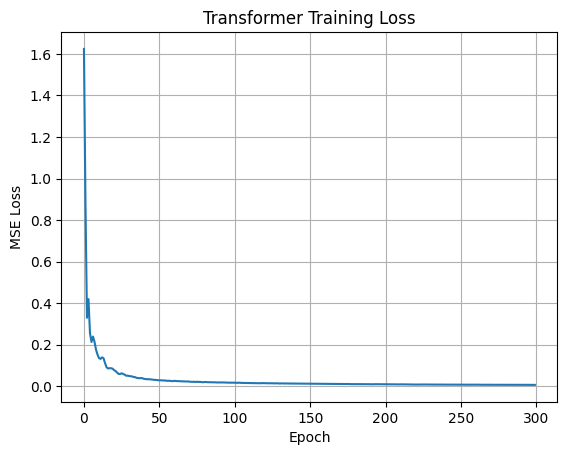

In [ ]:

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_seq, dtype=torch.float32).to(device)

losses = []
for epoch in range(300):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, Y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Transformer Training Loss')
plt.grid()
plt.show()

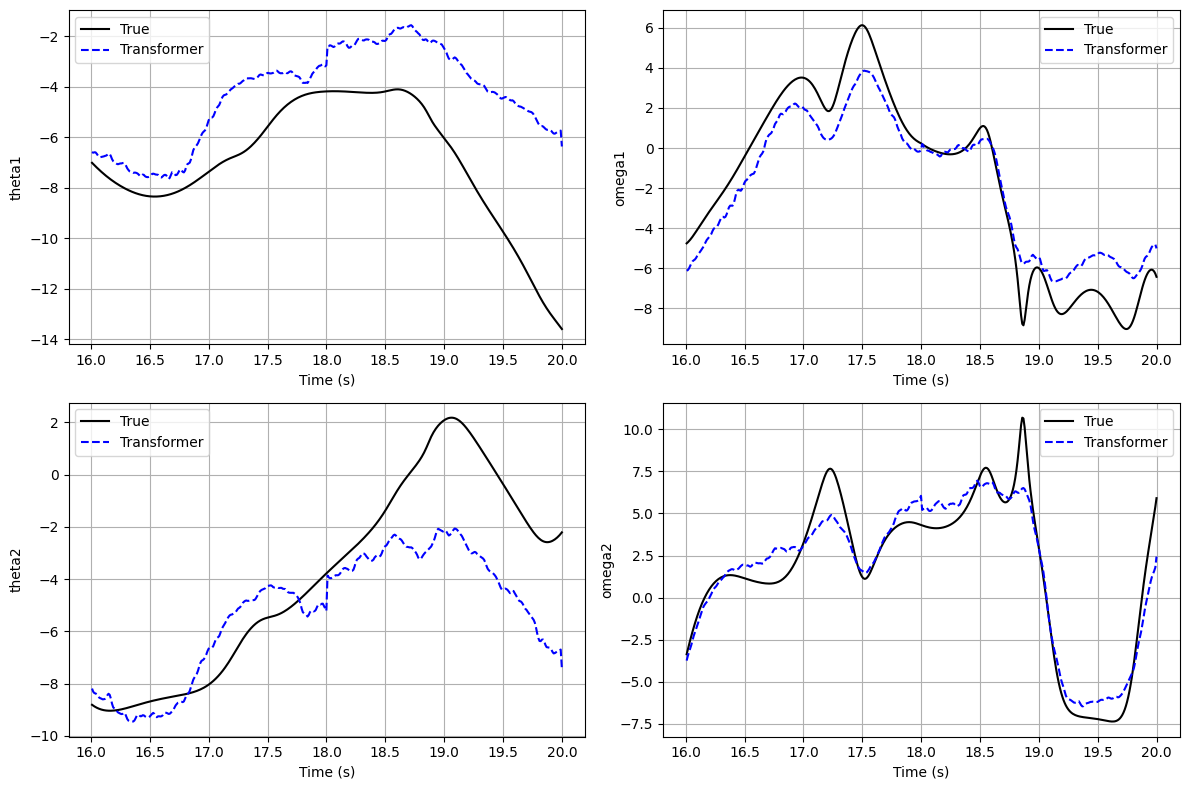

In [ ]:
# Test
def test_model(model, X_seq, Y_seq, scaler_Y):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X_seq, dtype=torch.float32).to(device)
        Y_pred_scaled = model(X_tensor).cpu().squeeze(0).numpy()
    return scaler_Y.inverse_transform(Y_pred_scaled)

Y_pred_test = test_model(model, X_test_seq, Y_test_seq, scaler_Y)
Y_true_test = scaler_Y.inverse_transform(Y_test_seq.squeeze(0))

# Plot test
plt.figure(figsize=(12, 8))
labels = ['theta1', 'omega1', 'theta2', 'omega2']
time = t_eval[split_idx+1:]
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(time, Y_true_test[:, i], label='True', color='black')
    plt.plot(time, Y_pred_test[:, i], '--', label='Transformer', color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel(labels[i])
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()
